In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import CubicSpline
import time

import os

# Question 2

a)

In [3]:
# u = mu / kT
# x = epsilon / kT

def Integrand(x, u):
    return (4 / np.sqrt(np.pi)) * np.sqrt(x) / (1 + np.exp(x - u))

In [4]:
u_values = np.linspace(-100, 100, 10000)
number_density_values = np.zeros_like(u_values)
error_values = np.zeros_like(u_values)
for i in range(len(u_values)):
    number_density_values[i], error_values[i] = quad(Integrand, 0, np.inf, args=(u_values[i]))

/var/folders/_4/tj762z9n28n0sz1jk8t987l00000gn/T/ipykernel_85140/3366179619.py:5: RuntimeWarning: overflow encountered in exp
  return (4 / np.sqrt(np.pi)) * np.sqrt(x) / (1 + np.exp(x - u))


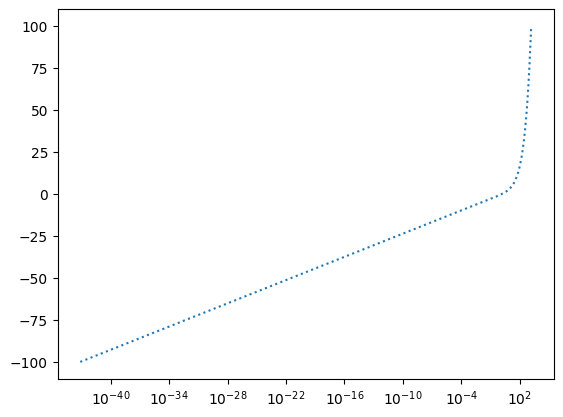

In [5]:
plt.plot(number_density_values, u_values, ':')

plt.xscale('log')

In [6]:
interp_u = CubicSpline(number_density_values, u_values)

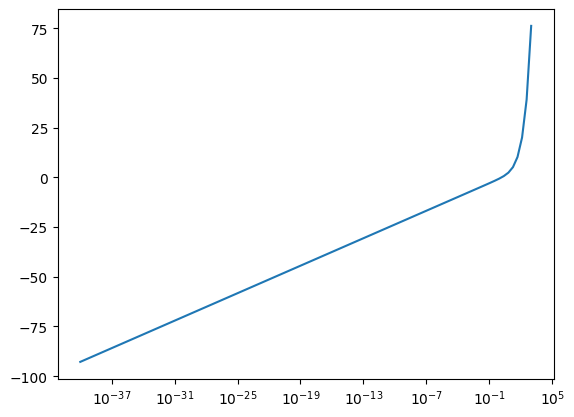

In [7]:
x = np.logspace(-40, 3, 100)
plt.plot(x, interp_u(x))
plt.xscale('log')

## c)

In [8]:
def NonDegenerate(n_nQ):
    return(np.log(n_nQ / 2))

def Degenerate(n_nQ):
    return (1/4) * np.cbrt(9 * np.pi) * (n_nQ)**(2/3)

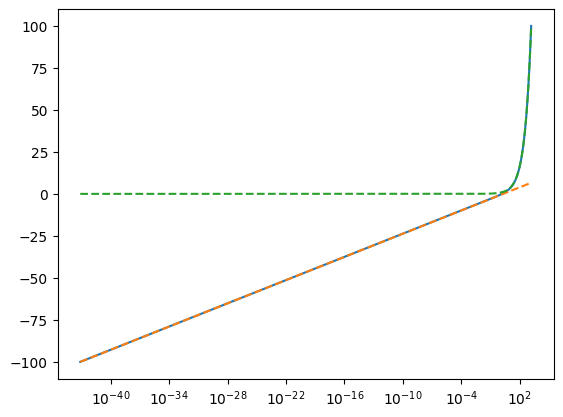

In [9]:
plt.plot(number_density_values, u_values)
plt.plot(number_density_values, NonDegenerate(number_density_values), '--')
plt.plot(number_density_values, Degenerate(number_density_values), '--')


plt.xscale('log')

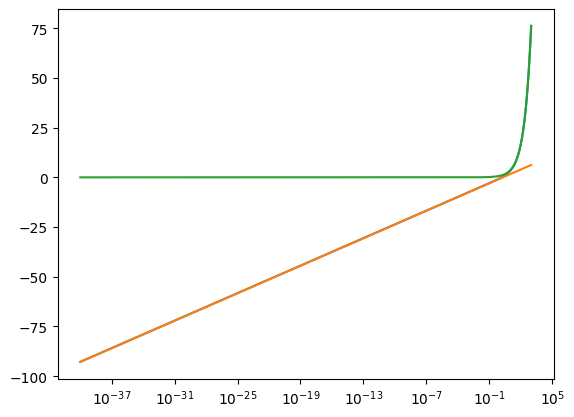

In [10]:
x = np.logspace(-40, 3, 1000)
plt.plot(x, interp_u(x))
plt.plot(x, NonDegenerate(x))
plt.plot(x, Degenerate(x))

plt.xscale('log')

In [11]:
non_degenerate_error = abs((interp_u(x) - NonDegenerate(x))/ interp_u(x))
degenerate_error = abs((interp_u(x) - Degenerate(x))/ interp_u(x))

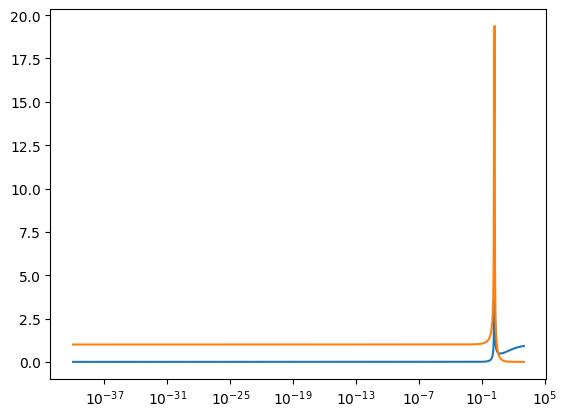

In [12]:
plt.plot(x, non_degenerate_error)
plt.plot(x, degenerate_error)

plt.xscale('log')

In [13]:
non_degenerate_space = x[non_degenerate_error <= 0.1]
degenerate_space = x[degenerate_error <= 0.1]

print(non_degenerate_space[0], non_degenerate_space[-1])
print(degenerate_space[0], degenerate_space[-1])


1e-40 0.5912508413831917
9.483681866285947 1000.0


# Quesiton 3

## a)

In [14]:
def fct(v):
    return np.sqrt(2 / np.pi) * v**2 * np.exp(-v**2 / 2)

In [15]:
def MaxwellBoltzmann(N): 
    N = int(N)
    
    seed = 100    
    rng = np.random.default_rng()
    
    x = rng.uniform(0, 5, 4*N)
    y = rng.uniform(0, 0.6, 4*N)

    y_limit = fct(x)

    x_rejected = x[y>y_limit]
    y_rejected = y[y>y_limit]

    x = x[y<=y_limit]
    y = y[y<=y_limit]
    
    return x[:N], y[:N], x_rejected[:N], y_rejected[:N]

In [16]:
t0 = time.time()

x, y, x_rejected, y_rejected = MaxwellBoltzmann(1e6)

t1 = time.time()
print('That took', t1-t0, ' seconds')

That took 0.16735601425170898  seconds


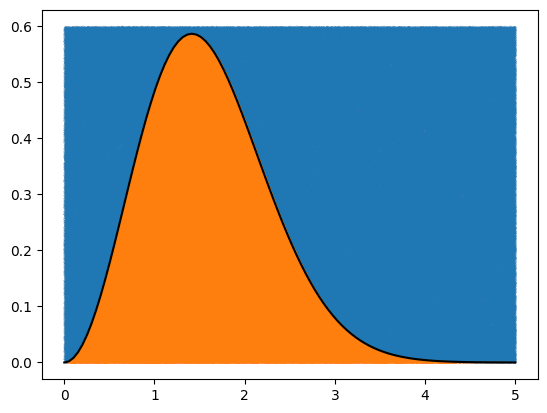

In [17]:
xx = np.linspace(0, 5, 100)
plt.plot(x_rejected, y_rejected, '.', ms=0.1)
plt.plot(x, y, '.', ms=0.1)
plt.plot(xx, fct(xx), 'k')

## b)


In [18]:
def plot_distribution(x, func):
    plt.hist(x, density=True, bins=100, histtype = 'step')
    xx = np.linspace(0, 5 ,100)
    plt.plot(xx, func(xx),':')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('x')
    plt.show()

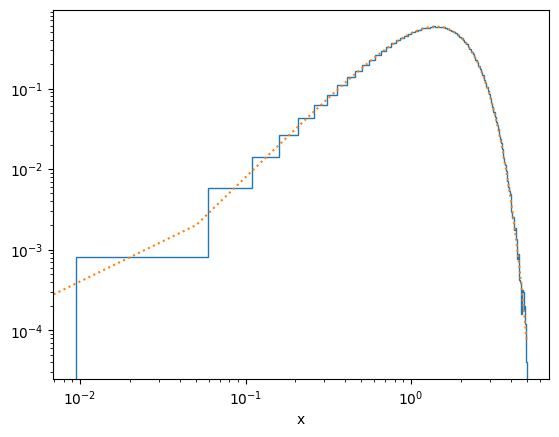

In [19]:
plot_distribution(x, fct)

## c)

In [20]:
def fractional_error(N):
    analytical_mean = np.sqrt(8 / np.pi)
    x = MaxwellBoltzmann(N)[0]
    numerical_mean = np.mean(x)
    error = abs(analytical_mean - numerical_mean)/analytical_mean
    return error
    


analytical_mean = np.sqrt(8 / np.pi)
numerical_mean = np.mean(x)

In [21]:
# N_values = np.logspace(0, 6, 7)
N_values = np.linspace(1, 1e6, 100)
Error = np.zeros_like(N_values)
for i in range(len(N_values)):
    Error[i] = fractional_error(N_values[i])

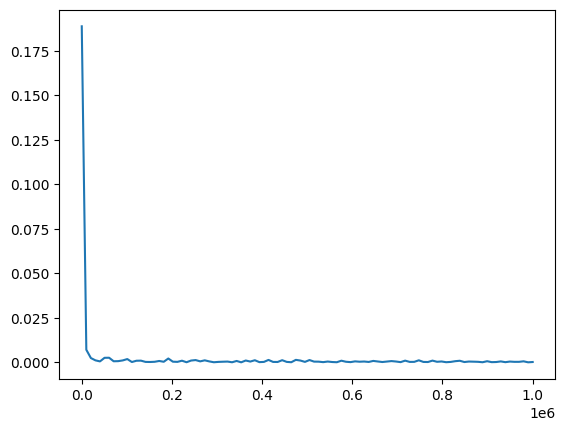

In [22]:
plt.plot(N_values, Error)
# plt.yscale('log')
# plt.xscale('log')

# Question 1

## a)

The error associated with the Trapizoidal rule stems from the fact that this rule makes a linear approximation estimate $f(x)$ between each point. The lowest order neglected terms are therefore quadratic terms. That is to say that in the Taylor expansion of $f(x)$, we include only the first two terms and the error is $\mathcal{O}(\Delta x)^2$.

The error associated with the Simpson's rule stems from the fact that this rule makes a quadratic approximation to estimate $f(x)$ between each point. Following the same logic as for the Trapizoidal rule, we would expect the lowest order neglected terms to be cubic. However, the cubic terms end up reducing due to the symmetry of the approximation. The error is therefore $\mathcal{O}(\Delta x)^4$.

## b)

Let c be some proportionality constant.
Let n be the exponential scaling of error with stepsize for a given rule.

$\epsilon_1 = c(\Delta x)^n$
$\epsilon_2 = c(2\Delta x)^n$

$I = I_1 + \epsilon_1 = I_2 + \epsilon_2$

$I_1 - I_2 = \epsilon_2 - \epsilon_1$

$I_1 - I_2 = c(2\Delta x)^n - c(\Delta x)^n = c(\Delta x)^n * (2^n - 1)$

$c(\Delta x)^n = \epsilon_1 = \frac{I_1 - I_2}{2^n - 1}$

For the Trapasoidal rule: n=2

$\epsilon_1 = \frac{I_1 - I_2}{2^2 - 1} = \frac{I_1 - I_2}{3}$

For the Simpson's rule: n=4:

$\epsilon_1 = \frac{I_1 - I_2}{2^4 - 1} = \frac{I_1 - I_2}{15}$


The above assumes that the scale factor, c, will be the same in case 1 and case 2. This is an estimation and may not be exactly true. 

## c)

In [32]:
data = np.loadtxt('hw2_data.txt')

x = data[:, 0]  # Get x-values
y = data[:, 1]  # Get y-values